# Loading Iris Data Set

In [65]:
#import iris data-set
from sklearn.datasets import load_iris

#save data-set in a variable and check type
iris= load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [19]:
#check data-set
#print(iris.data)
print(iris.data.shape)

(150, 4)


In [20]:
#Validate Dataset
print(iris.feature_names)
print(iris.target)
print(type(iris.target))
print(iris.target.shape)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150,)
['setosa' 'versicolor' 'virginica']


In [39]:
#Store Data
X = iris.data
y= iris.target

# Model Training

In [66]:
#review dataset
from IPython.display import IFrame
#IFrame('https://archve.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',width=200,height=100)
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X=X,y=y)

print("KNN Value for [3,5,4,2] :: ", knn.predict([3,5,4,2]))

KNN Value for [3,5,4,2] ::  [2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [67]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X=X,y=y)
print("Logistic Regression Value for [3,5,4,2] :: ", logreg.predict([3,5,4,2]))


Logistic Regression Value for [3,5,4,2] ::  [2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Evaluation of Models
## 1.Train & Test entire dataset

In [68]:
# Logistic Regression
y_pred_log = logreg.predict(X)
y_pred_knn = knn.predict(X)
print("Logistic Regression Performance :: ",metrics.accuracy_score(y,y_pred_log))
print("KNN Performance :: ",metrics.accuracy_score(y,y_pred_knn))

Logistic Regression Performance ::  0.96
KNN Performance ::  1.0


## 2. Train/Test Split

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)
print("Train Sample :: ", X_train.shape) 
print("Test Sample :: ", X_test.shape) 

Train Sample ::  (90, 4)
Test Sample ::  (60, 4)


In [75]:
logreg.fit(X_train,y_train)
knn.fit(X_train,y_train)

y_pred_log = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
print("Logistic Regression Performance :: ",metrics.accuracy_score(y_test,y_pred_log))
print("KNN Performance :: ",metrics.accuracy_score(y_test,y_pred_knn))

Logistic Regression Performance ::  0.95
KNN Performance ::  0.95


In [92]:
# Varying Value of K from 1 to 25

scores=[]
for k in range(1,26):
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_knn= knn.predict(X_test)
    print("KNN Performance with k:{} :: {} ".format(k,metrics.accuracy_score(y_test,y_pred_knn)))
    scores.append(metrics.accuracy_score(y_test,y_pred_knn))
    

KNN Performance with k:1 :: 0.95 
KNN Performance with k:2 :: 0.95 
KNN Performance with k:3 :: 0.9666666666666667 
KNN Performance with k:4 :: 0.9666666666666667 
KNN Performance with k:5 :: 0.9666666666666667 
KNN Performance with k:6 :: 0.9833333333333333 
KNN Performance with k:7 :: 0.9833333333333333 
KNN Performance with k:8 :: 0.9833333333333333 
KNN Performance with k:9 :: 0.9833333333333333 
KNN Performance with k:10 :: 0.9833333333333333 
KNN Performance with k:11 :: 0.9833333333333333 
KNN Performance with k:12 :: 0.9833333333333333 
KNN Performance with k:13 :: 0.9833333333333333 
KNN Performance with k:14 :: 0.9833333333333333 
KNN Performance with k:15 :: 0.9833333333333333 
KNN Performance with k:16 :: 0.9833333333333333 
KNN Performance with k:17 :: 0.9833333333333333 
KNN Performance with k:18 :: 0.9666666666666667 
KNN Performance with k:19 :: 0.9833333333333333 
KNN Performance with k:20 :: 0.9666666666666667 
KNN Performance with k:21 :: 0.9666666666666667 
KNN Perf

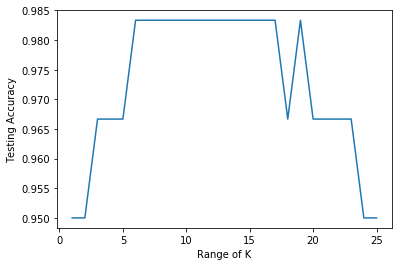

In [93]:
#Plotting Graph

import matplotlib.pyplot as plt

#allow plot to appear inline
%matplotlib inline
plt.plot(range(1,26),scores),
plt.xlabel("Range of K")
plt.ylabel("Testing Accuracy")

# Coss Validation 

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)
print("Accuracy at K = 5 is {}".format(metrics.accuracy_score(y_test,y_pred_knn)))

Accuracy at K = 5 is 0.9666666666666667


## Simulating K-fold Cross-Validation

In [108]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,shuffle=False)
for train_index,test_index in kf.split(X):
    X_train,X_test= X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    knn.fit(X_train,y_train)
    y_pred_knn= knn.predict(X_test)
    print("Accuracy at K = 5 is {}".format(metrics.accuracy_score(y_test,y_pred_knn)))
    


Accuracy at K = 5 is 1.0
Accuracy at K = 5 is 1.0
Accuracy at K = 5 is 0.8333333333333334
Accuracy at K = 5 is 0.9333333333333333
Accuracy at K = 5 is 0.8


### Cross Validation : parameter tuning

In [118]:
from sklearn.model_selection import cross_val_score

# 10 Fold cross-validation with K=5 for KNN
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy',n_jobs=-1)
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [123]:
scores=[]
for k in range(1,26):
    knn =  KNeighborsClassifier(n_neighbors=k)
    k_scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy',n_jobs=-1)
    scores.append(k_scores.mean())
print(scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656]


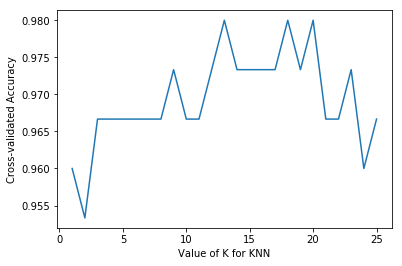

In [124]:
plt.plot(range(1,26),scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-validated Accuracy")

### Model Selection

In [126]:
knn =  KNeighborsClassifier(n_neighbors=20)
print("KNN Mean :: " ,cross_val_score(knn,X,y,cv=10,scoring='accuracy',n_jobs=-1).mean())

print("Logistic Regression Mean :: ",cross_val_score(logreg,X,y,cv=10,scoring='accuracy',n_jobs=-1).mean())




KNN Mean ::  0.98
Logistic Regression Mean ::  0.953333333333


### Auto selection of Parameter

In [135]:
from sklearn.grid_search import GridSearchCV

k_range=list(range(1,30))
weight_options= ['uniform','distance']

#creating a parameter grid: creating dict with parameter names & list of values to be searched
param_grid = dict(n_neighbors=k_range,weights=weight_options)
print(param_grid)

#instantiate the grid
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy', n_jobs=-1)

grid.fit(X,y)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [136]:
#view complete scores
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [150]:
#create list of only means

grid_mean =  [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean)

[0.96, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.96, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.9666666666666667, 0.98, 0.9533333333333334, 0.9733333333333334, 0.9533333333333334, 0.9733333333333334]


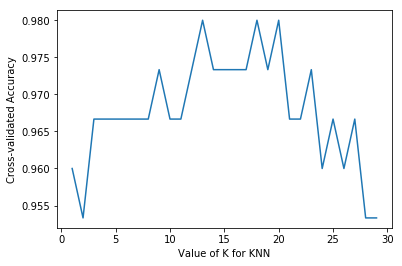

In [145]:
#works if only one parameter was used
plt.plot(range(1,30),grid_mean[::2])
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-validated Accuracy")

In [146]:
#examine the best model

print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [148]:
# So either use new object or grid

knn = KNeighborsClassifier(n_neighbors=13,weights='uniform')
knn.fit(X,y)
print(knn.predict([3,5,4,2]))

print(grid.predict([3,5,4,2]))


[1]
[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Reducing Computational Cost via Randomizing

In [164]:
from sklearn.grid_search import RandomizedSearchCV

param_dist= dict(n_neighbors=k_range,weights=weight_options)
#n_iter controls nimber of searches

rand = RandomizedSearchCV(knn,param_grid,cv=10,scoring='accuracy',n_iter=10,random_state=5,n_jobs=-1)
rand.fit(X,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 26},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [165]:
#examine the best model

print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [168]:
# Running Randomization 20 times
best_scores=[]
for i in list(range(1,20)):
    rand = RandomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10,random_state=5,n_jobs=-1)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_,3))
print(best_scores)


[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]
